In [1]:
import pandas as pd
yoy_dir = "~/Projects/strategy-evaluator/output/yoy"
algorithm = "head-and-shoulders"

In [2]:
df = pd.read_csv(f"{yoy_dir}/yoy_{algorithm}.csv", delimiter=',', index_col=0)
df = df.sort_values(by='year') # sort from least recent to most recent year
df = df.drop(df.index[-1]) # current year is not complete
display(df)

,performance,ups,downs,limits
year,,,,
1962,0.576271,34,25,18
1963,0.866667,39,6,18
1964,0.918919,68,6,59
1965,1.000000,19,0,23
1966,0.210526,8,30,4
...,...,...,...,...
2018,0.430238,885,1172,283
2019,0.632940,1126,653,434
2020,0.511689,1554,1483,257


In [3]:
df_pruned = df.loc[df.index > 1980]
display(df_pruned)

,performance,ups,downs,limits
year,,,,
1981,0.447674,231,285,133
1982,0.407229,169,246,74
1983,0.435511,260,337,72
1984,0.519504,293,271,30
1985,0.616279,477,297,348
1986,0.476518,416,457,285
1987,0.393175,530,818,87
1988,0.519413,602,557,348
1989,0.517140,528,493,476


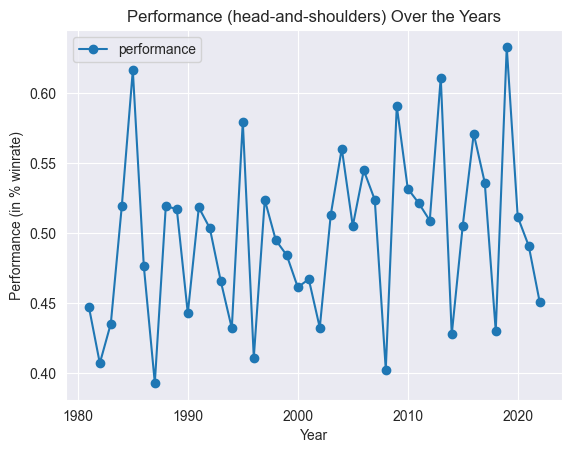

In [4]:
import matplotlib.pyplot as plt

# Plot the performance column against the year column
df_pruned.plot(y='performance', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Show the plot
plt.show()

In [5]:
import numpy as np
from scipy import stats
years = np.array(df_pruned.index)
values = np.array(df_pruned["performance"].values)

slope, intercept, r_value, p_value, std_err = stats.linregress(years, values)

print("Head and Shoulders")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (correlation coefficient): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

Head and Shoulders
Slope: 0.0013
Intercept: -2.0401
R-value (correlation coefficient): 0.2587
P-value: 0.0980
Standard error: 0.0007


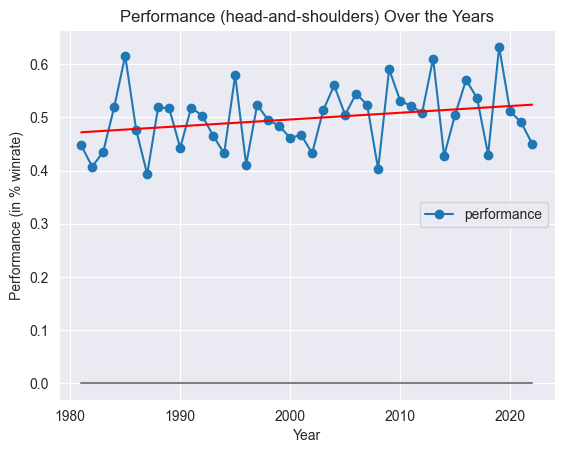

In [6]:
# Plot the DataFrame
df_pruned.plot(y='performance', marker='o')
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Plot the regression line
regression_line = slope * years + intercept
plt.plot(years, regression_line, color='red')
plt.plot(years, 0*years, color='gray')
plt.savefig(f"./figures/yoy_perf_{algorithm}.svg", format="svg")

# Display the plot
plt.show()